# Deforestación en el Caquetá
[Especial revista Semana](https://especiales.semana.com/deforestacion/caqueta.html)

In [3]:
from IPython.display import IFrame    
IFrame('https://especiales.semana.com/deforestacion/caqueta.html', width=960, height=400)

In [15]:
import arcgis
from arcgis import *
from arcgis.mapping import MapImageLayer
import time 
from IPython import display
import arcpy
# from bokeh.io import push_notebook, show, output_notebook
# from bokeh.plotting import figure
# output_notebook()
import os
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
from arcgis.raster.functions import *

## Conección a ArcGIS online

In [7]:
gis = GIS("https://www.arcgis.com",'rcmartinb')

Enter password: ········


### Buscamos el item de landsat del living atlas

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>
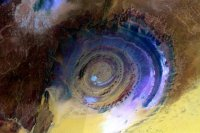

In [9]:
#Guardamos item de landsat
landsat_item=gis.content.search('title:Multispectral Landsat','Imagery Layer',outside_org=True)[0]
landsat=landsat_item.layers[0]
landsat_item

In [10]:
#definimos la extención
aoi = {'spatialReference': {'latestWkid': 4326}, 'type': 'extent', 
       'xmax': -73.8552, 'xmin': -74.0050, 'ymax': 1.4864, 'ymin': 1.3628}

arcgis.env.analysis_extent = aoi

landsat.extent = aoi

### Buscamos las imagenes mediante un DataFrame de pandas

In [12]:
#buscamos imagenes
import pandas as pd
from datetime import datetime

selected = landsat.filter_by(where="(Category = 1)",
                             time=[datetime(2016, 1, 15), datetime(2019, 3, 1)],
                             geometry=arcgis.geometry.filters.intersects(aoi))

df = selected.query(out_fields="AcquisitionDate, GroupName, CloudCover, DayOfYear,dataset_id", 
                    order_by_fields="AcquisitionDate").sdf
df['AcquisitionDate'] = pd.to_datetime(df['AcquisitionDate'], unit='ms')
df.tail(3)

,AcquisitionDate,CloudCover,DayOfYear,GroupName,OBJECTID,SHAPE,Shape_Area,Shape_Length,dataset_id
67,2019-01-24 15:07:09,0.8726,24,LC80070592019024LGN00_MTL,98221,"{""rings"": [[[-8114234.9679000005, 56038.122000...",3.486233e+10,747453.078814,Landsat8
68,2019-02-09 15:07:07,0.5766,40,LC80070592019040LGN00_MTL,2407193,"{""rings"": [[[-8076005.6592999995, 236150.57389...",3.489326e+10,747553.941855,Landsat8
69,2019-02-25 15:07:04,0.0056,56,LC80070592019056LGN00_MTL,3006243,"{""rings"": [[[-8076075.8233, 236150.37099999934...",3.490195e+10,747642.924013,Landsat8


In [13]:
df.head(3)

,AcquisitionDate,CloudCover,DayOfYear,GroupName,OBJECTID,SHAPE,Shape_Area,Shape_Length,dataset_id
0,2016-01-16 15:07:27,0.2056,16,LC80070592016016LGN02_MTL,2727491,"{""rings"": [[[-8078058.593, 236058.8440000005],...",3.488116e+10,747423.396849,Landsat8
1,2016-02-01 15:07:25,0.0000,32,LC80070592016032LGN02_MTL,2737304,"{""rings"": [[[-8078703.115800001, 236175.530499...",3.488137e+10,747425.668092,Landsat8
2,2016-02-17 15:07:16,0.8608,48,LC80070592016048LGN00_MTL,1966465,"{""rings"": [[[-8073663.1775, 235920.4226000011]...",3.574392e+10,756416.670394,Landsat8


In [14]:
#guardamos las imagenes
raster2019 = landsat.filter_by("GroupName='LC80070592019056LGN00_MTL'") #02 25 2019
raster2016 = landsat.filter_by("GroupName='LC80070592016016LGN02_MTL'") #01 16 2016

### Importamos las funciones para tratar los datos raster y las visualizamos

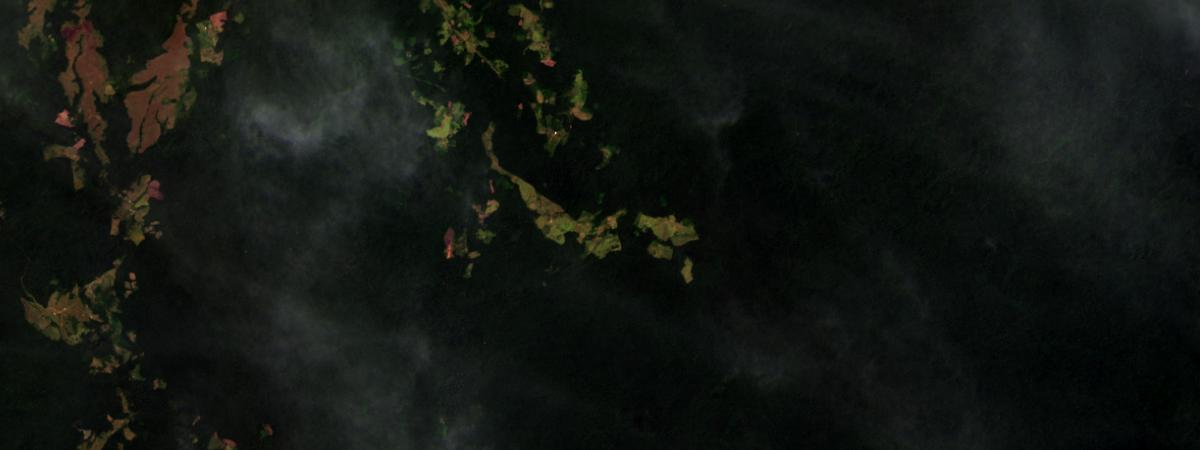

In [17]:
extract_band(raster2016, [4,3,2])

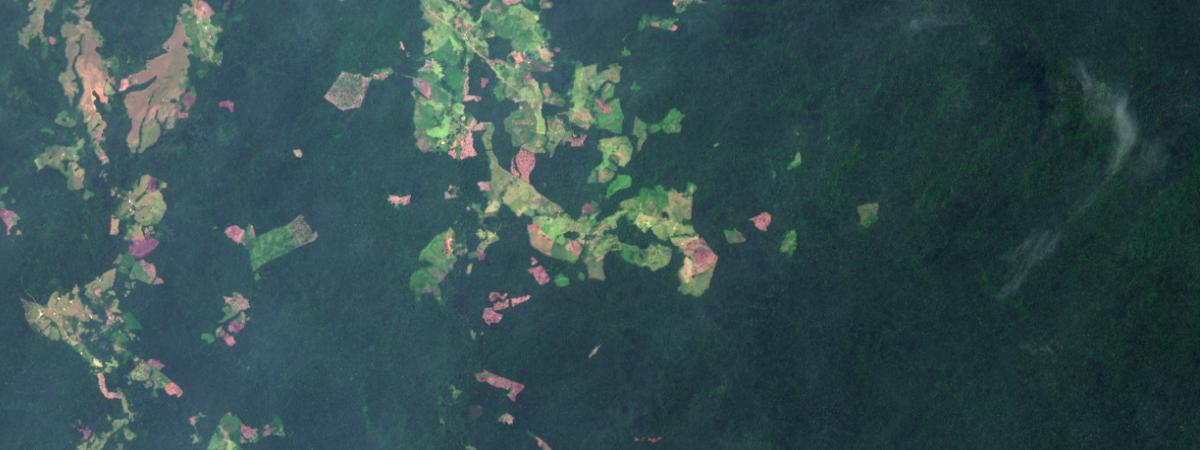

In [18]:
extract_band(raster2019, [4,3,2])

In [19]:
#clip del area de estudio
clip2016=clip(raster2016, aoi)
clip2019=clip(raster2019,aoi)

# NDVI

El Índice de Vegetación de Diferencia Normalizada, también conocido como NDVI por sus siglas en inglés, es un índice de vegetación que se utiliza para estimar la cantidad, calidad y desarrollo de la vegetación con base a la medición de la intensidad de la radiación de ciertas bandas del espectro electromagnético que la vegetación emite o refleja.

Para el cálculo de los índices de vegetación es necesaria la información que se encuentra en las bandas roja e infrarroja de ese espectro electromagnético.

El cálculo del NDVI se hace mediante la siguiente fórmula:
### NDVI = (NIR-VIS)/(NIR+VIS)

En Landsat 8, NDVI = (Band 5 – Band 4) / (Band 5 + Band 4).


    

[Mapping GIS - NDVI: Qué es y cómo calcularlo](https://mappinggis.com/2015/06/ndvi-que-es-y-como-calcularlo-con-saga-desde-qgis/)

[USGS - Landsat Surface Reflectance-Derived Spectral Indices](https://www.usgs.gov/land-resources/nli/landsat/landsat-normalized-difference-vegetation-index?qt-science_support_page_related_con=0#qt-science_support_page_related_con)

  

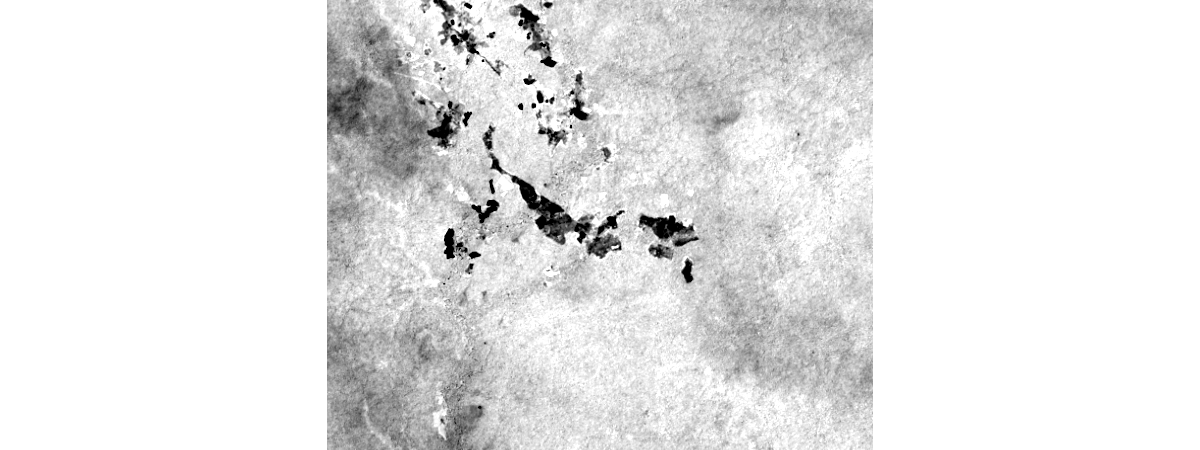

In [22]:
ndvi_2016 = clip(band_arithmetic(raster2016, "(b5 - b4) / (b5 + b4)"),aoi)
ndvi_2016

In [23]:
for fn in clip2019.properties.rasterFunctionInfos:
    print(fn['name'])

Agriculture with DRA
Bathymetric with DRA
Color Infrared with DRA
Natural Color with DRA
Short-wave Infrared with DRA
Geology with DRA
Agriculture
Bathymetric
Color Infrared
Geology
Natural Color
Short-wave Infrared
NDVI Colorized
Normalized Difference Moisture Index Colorized
NDVI Raw
NBR Raw
Band 10 Surface Temperature in Fahrenheit
Band 11 Surface Temperature in Fahrenheit
Band 10 Surface Temperature in Celsius
Band 11 Surface Temperature in Celsius
None


Repetimos el proceso

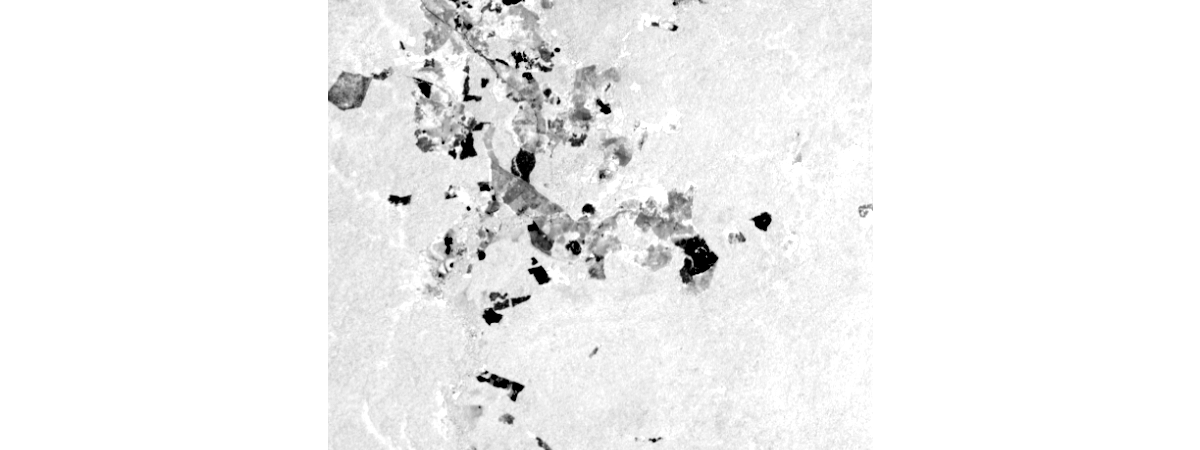

In [24]:
ndvi2019 = apply(clip2019, 'NDVI Raw')
ndvi2019

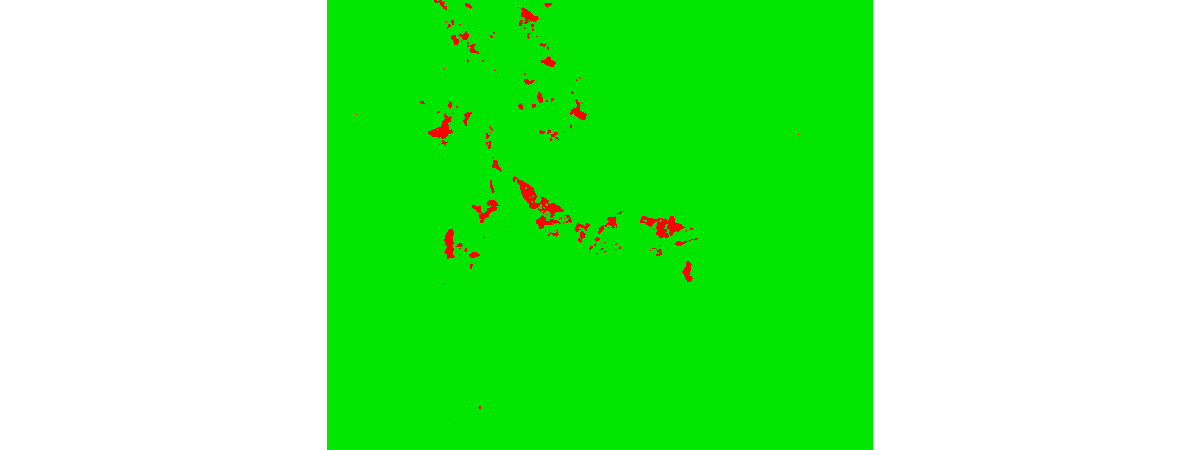

In [25]:
ndvi2016pp = colormap(remap(ndvi_2016,
                             input_ranges=[0.2,  0.6,  # Perdida
                                           0.6, 0.8], # Bosque
                             output_values=[1, 2],                    
                             no_data_ranges=[-1, 0.1], astype='u8'), 
                       colormap=[[2, 1, 230, 0], [1, 255, 0,    0]])
ndvi2016pp

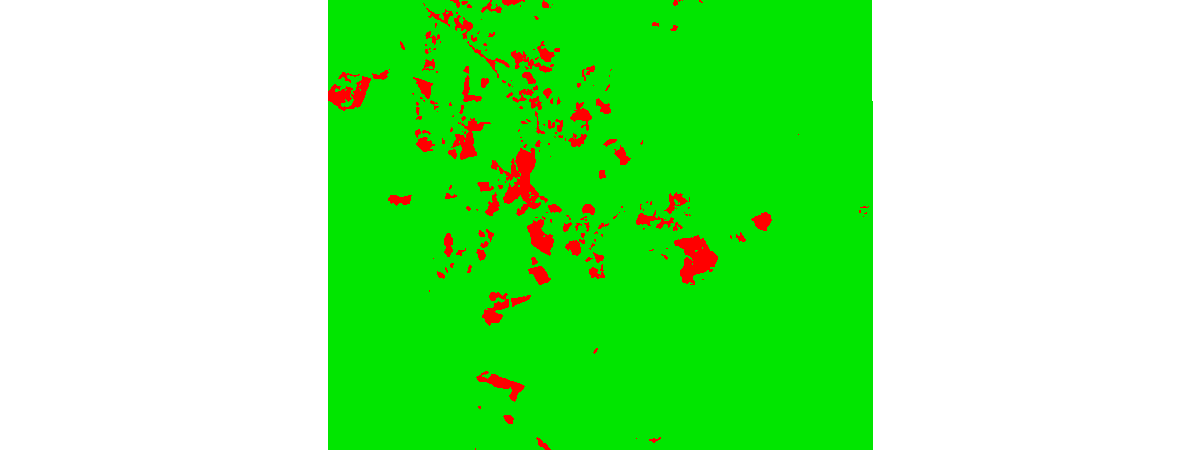

In [26]:
ndvi2019pp = colormap(remap(ndvi2019,
                             input_ranges=[0.2,  0.6,  # Perdida
                                           0.6, 0.8], # Bosque
                             output_values=[1, 2],                    
                             no_data_ranges=[-1, 0.1], astype='u8'), 
                       colormap=[[2, 1, 230, 0], [1, 255, 0,    0]])
ndvi2019pp

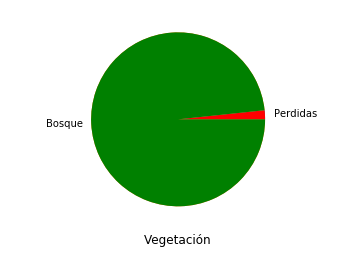

In [27]:
ndvihist = ndvi2016pp.compute_histograms(aoi)
histogram = ndvihist['histograms'][0]['counts'][0:]
histogram.pop(0)
plt.title('Vegetación', y=-0.1)
plt.pie(histogram, labels=['Perdidas','Bosque']);
plt.axis('equal');
plt.pie(histogram, colors=['red','green']);

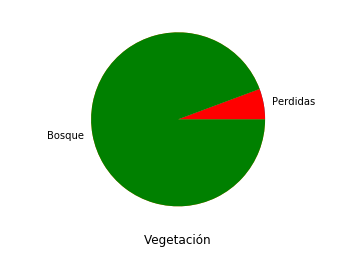

In [28]:
ndvihist = ndvi2019pp.compute_histograms(aoi)
histogram = ndvihist['histograms'][0]['counts'][0:]
histogram.pop(0)
plt.title('Vegetación', y=-0.1)
plt.pie(histogram, labels=['Perdidas','Bosque']);
plt.axis('equal');
plt.pie(histogram, colors=['red','green']);

### Restamos los ndvi para ver los cambios

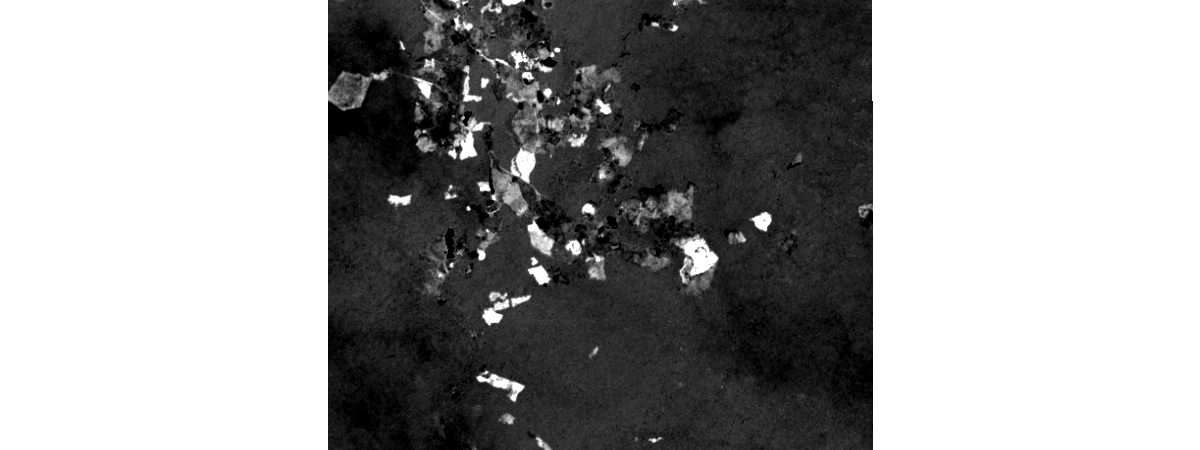

In [32]:
ndvi_dif=ndvi_2016-ndvi2019
ndvi_dif

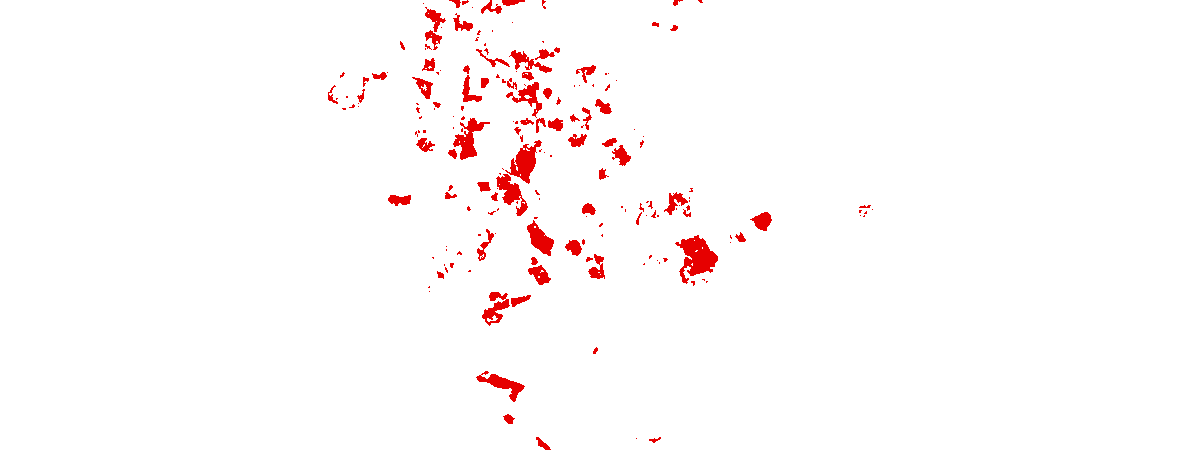

In [33]:
Diffar = colormap(remap(ndvi_dif,
                             input_ranges=[-0.1,  -0.1,  # Valores a confirmar
                                           0.1, 0.45], 
                             output_values=[1, 2],                    
                             no_data_ranges=[-0.1, 0.1], astype='u8'), 
                       colormap=[ [2,  0xE6, 0,    0], [1, 0xE6, 0,    0]])
Diffar

### Podemos publicarla facilmente

In [47]:
publicada = Diffar.save(output_name='Deforestación caqueta 2016-2019', for_viz=True, gis = gis)
publicada

<Item title:"Raster ejmplo 123" type:Imagery Layer owner:rcmartinb>

### Creamos un mapa para visualizarlo

In [34]:
m = gis.map()
m.center = [1.4223, -73.9301]  
m.zoom = 11
m.basemap = 'satellite'
m.add_layer(Diffar)
m

MapView(layout=Layout(height='400px', width='100%'), zoom=11.0)

### Para calcular el area podemos:
Primero calculamos la cantidad de pixeles de la ima

In [35]:
res = Diffar.compute_histograms(aoi)
numpix = 0
histogram = res['histograms'][0]['counts'][0:]
for i in histogram:
    numpix += i

Multiplicamos la cantidad de pixeles por el area de pixel que en el caso de Landsat 8 es de 30 metros

[Satélite de imágenes LANDSAT-8](http://geocento.es/galeria-de-satelites-para-buscar-y-adquirir-imagenes/satelite-imagenes-landsat-8/)

In [37]:
from IPython.display import HTML
sqmarea = numpix * 30 * 30 # sq m
has = sqmarea/10000   # has

print('Se perdieron {} hectareas desde {} hasta el {}.'.format(int(has), df.iloc[0]['AcquisitionDate'].date(),df.iloc[-1]['AcquisitionDate'].date()))

Se perdieron 1186 hectareas desde 2016-01-16 hasta el 2019-02-25.
